In [1]:
%matplotlib ipympl
import pyLinViscoFit as visco
from pyLinViscoFit import styles
styles.format_fig()

***
# Verification - Comparison with APDL 2021 R1

## Master curve in frequency domain

In [2]:
#Load user master curve in frequency domain and user shift factors
data = visco.load.file('./freq_master/freq_user_master.csv')
shift = visco.load.file('./freq_master/freq_user_master_aT.csv')
RefT = -5
domain = 'freq'
df_master = visco.load.user_master(data, domain, RefT)
df_aT = visco.load.user_shift(shift)

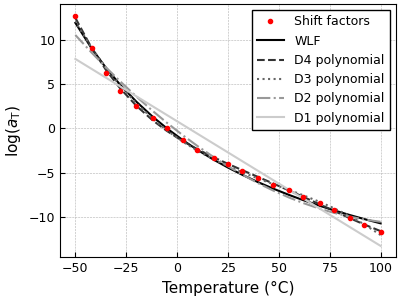

In [3]:
#Shift functions
df_WLF = visco.shift.fit_WLF(df_master.RefT, df_aT)
df_poly = visco.shift.fit_poly(df_aT)

fig_shift, df_shift = visco.shift.plot(df_aT, df_WLF, df_poly)

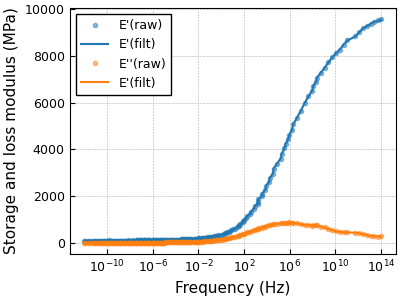

In [4]:
#Smooth master curve
win = 5
df_master = visco.master.smooth(df_master, win)
fig_smooth = visco.master.plot_smooth(df_master)

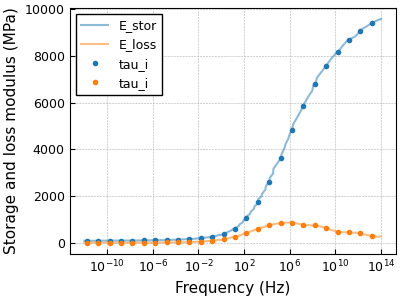

In [5]:
#Discretize number of Prony terms
df_dis = visco.prony.discretize(df_master)
fig_dis = visco.prony.plot_dis(df_master, df_dis)

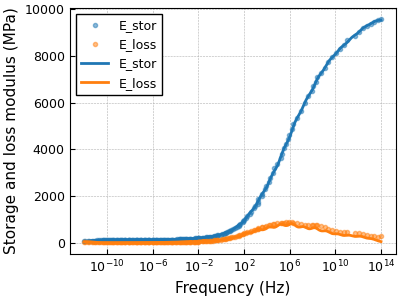

In [6]:
#Fit Prony series parameter
prony, df_GMaxw = visco.prony.fit(df_dis)
fig_fit = visco.prony.plot_fit(df_master, df_GMaxw)

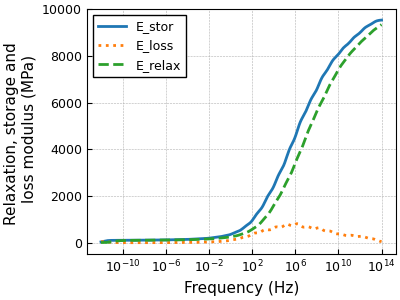

In [7]:
#Plot Generalized Maxwell model
fig_GMaxw = visco.prony.plot_GMaxw(df_GMaxw);

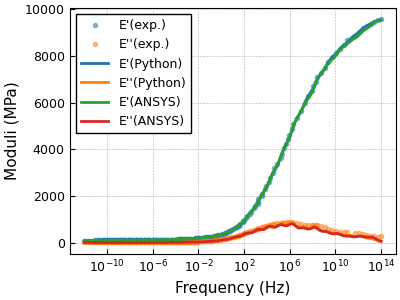

In [8]:
#Compare Python fit with ANSYS APDL
df_prony_ANSYS = visco.verify.load_prony_ANSYS('./freq_master/prony_terms.MPL')
prony_ANSYS = visco.verify.prep_prony_ANSYS(df_prony_ANSYS, prony)
nprony = prony_ANSYS['df_terms'].shape[0]
df_GMaxw_ANSYS = visco.prony.calc_GMaxw(**prony_ANSYS, decades = nprony)
fig_fit_ANSYS = visco.verify.plot_fit_ANSYS(df_master, df_GMaxw, df_GMaxw_ANSYS)

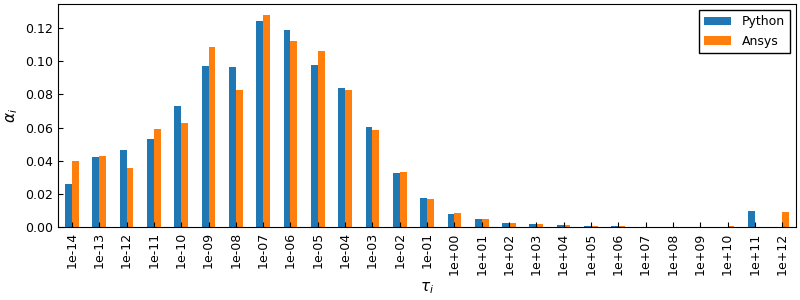

In [9]:
fig_coeff = visco.prony.plot_param([prony, prony_ANSYS], ['Python', 'Ansys'])

### Optional optimization of number of Prony terms

Prony series fit N = 24: Succesful!
Prony series fit N = 22: Succesful!
Prony series fit N = 20: Succesful!
Prony series fit N = 19: Succesful!
Prony series fit N = 18: Succesful!
Prony series fit N = 17: Succesful!
Prony series fit N = 16: Succesful!
Prony series fit N = 15: Succesful!
Prony series fit N = 14: Succesful!
Prony series fit N = 13: Succesful!
Prony series fit N = 12: Succesful!
Prony series fit N = 11: Succesful!
Prony series fit N = 10: Succesful!
Prony series fit N = 09: Succesful!
Prony series fit N = 08: Succesful!
Prony series fit N = 07: Succesful!
Prony series fit N = 06: Succesful!
Prony series fit N = 05: Succesful!
Prony series fit N = 04: Succesful!
Prony series fit N = 03: Succesful!


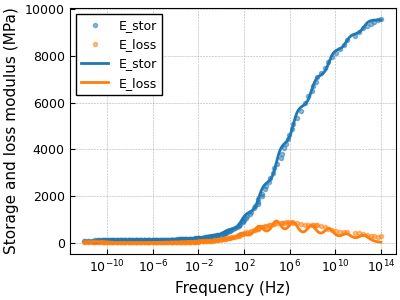

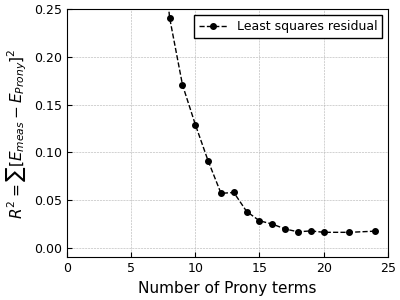

In [10]:
dict_prony, N_opt, N_opt_err = visco.opt.nprony(df_master, prony, window='min')
df_GMaxw_opt, fig_opt = visco.opt.plot_fit(df_master, dict_prony, N_opt)
fig_res = visco.opt.plot_residual(N_opt_err)

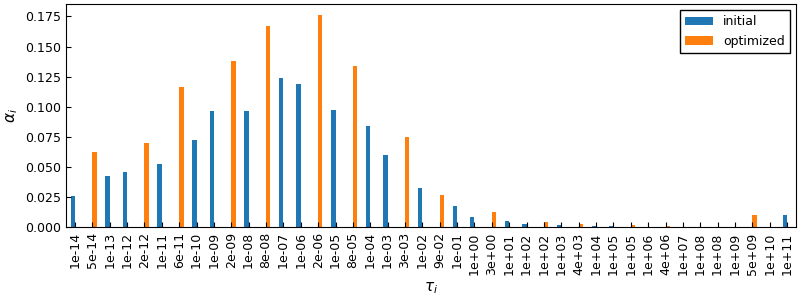

In [11]:
fig_coeff = visco.prony.plot_param([prony, dict_prony[N_opt]], ['initial', 'optimized'])